In [1]:
import arviz as az
import matplotlib.cm as cmap
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import scipy.stats as stats
import aesara
import aesara.tensor as at

%matplotlib inline

In [2]:
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)
az.style.use("arviz-darkgrid")

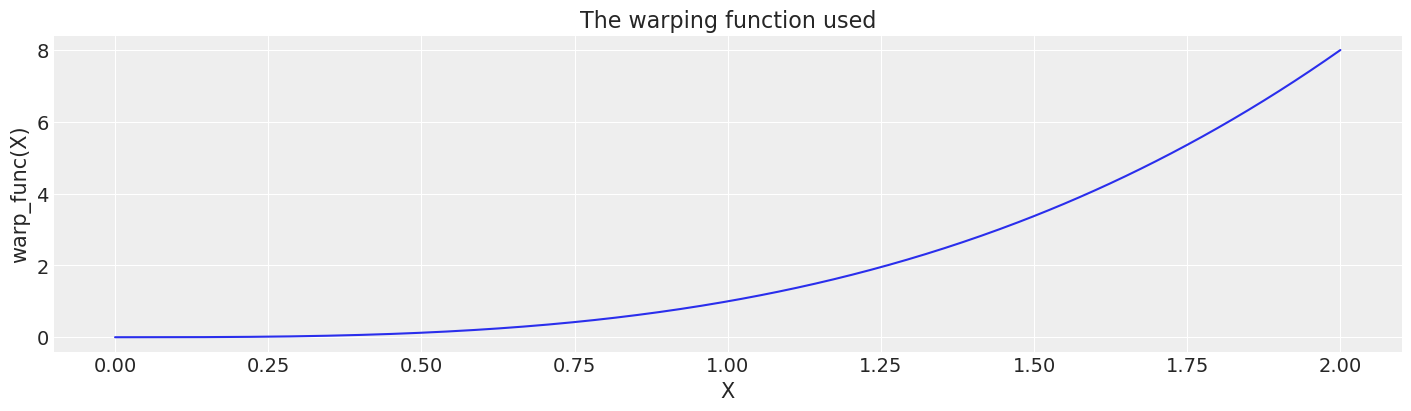

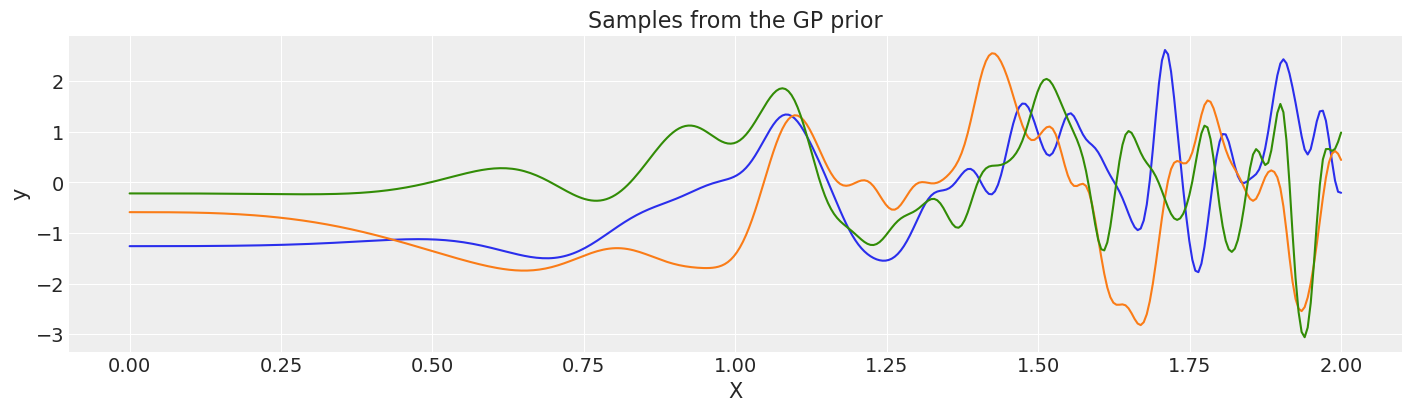

In [41]:
# def warp_func(x, a, b, c):
#     return 1.0 + x + (a * at.tanh(b * (x - c)))

def warp_func(x, a, b, c):
    return at.tensor_copy(x**3)

a = 1.0
b = 5.0
c = 1.0

cov_exp = pm.gp.cov.ExpQuad(1, 0.2)
cov = pm.gp.cov.WarpedInput(1, warp_func=warp_func, args=(a, b, c), cov_func=cov_exp)
# Add white noise to stabilise
cov += pm.gp.cov.WhiteNoise(1e-6)

X = np.linspace(0, 2, 400)[:, None]
wf = warp_func(X.flatten(), a, b, c).eval()

plt.figure(figsize=(14, 4))
plt.plot(X, wf)
plt.xlabel("X")
plt.ylabel("warp_func(X)")
plt.title("The warping function used")

K = cov(X).eval()
plt.figure(figsize=(14, 4))
plt.plot(X, pm.draw(pm.MvNormal.dist(mu=np.zeros(len(K)), cov=K, shape=len(K)), 3).T)
plt.title("Samples from the GP prior")
plt.ylabel("y")
plt.xlabel("X");